In [ ]:
# Import necessary library
import pandas as pd
import numpy as np

# Load the dataset (replace 'your_dataset.csv' with the actual file path if you're loading from local)
df = pd.read_csv('data.csv')

# Check the first few rows of the datase
df.head(100)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Check data types of each column
data_types = df.dtypes

# Display missing values and data types
missing_values, data_types


(customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 customerID           object
 gender               object
 SeniorCitizen         int64
 Partner              object
 Dependents           object
 tenure                int64
 PhoneService         object
 MultipleLines        object
 InternetService      object
 OnlineSecurity       object
 OnlineBackup         object
 DeviceProtection     object
 TechSupport          object
 StreamingTV          object
 StreamingMovies      object
 Contract             object
 PaperlessBilling     object
 PaymentM

Checking for no of NAN values in TotalCharges

In [ ]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any remaining NaN values in 'TotalCharges' after conversion
missing_total_charges = df['TotalCharges'].isnull().sum()

# Display the number of NaN values in 'TotalCharges' to decide on further steps
missing_total_charges


11

In [ ]:
df['TotalCharges'].describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


Replace NaN values in 'TotalCharges' with median



In [ ]:
# Replace NaN values in 'TotalCharges' with 0 using a different approach to avoid the warning
df.loc[df['TotalCharges'].isnull(), 'TotalCharges'] = df['TotalCharges'].median()

# Verify there are no remaining NaN values in 'TotalCharges'
df['TotalCharges'].isnull().sum()


0

**Visualizing the dataset**

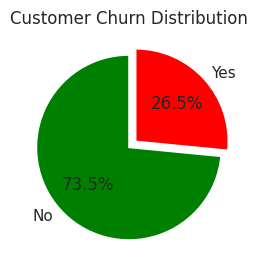

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Count churn occurrences
churn_counts = df['Churn'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 3))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, explode=[0,0.1], colors=['green', 'red'])
plt.title('Customer Churn Distribution')
plt.show()

Demography of dataset

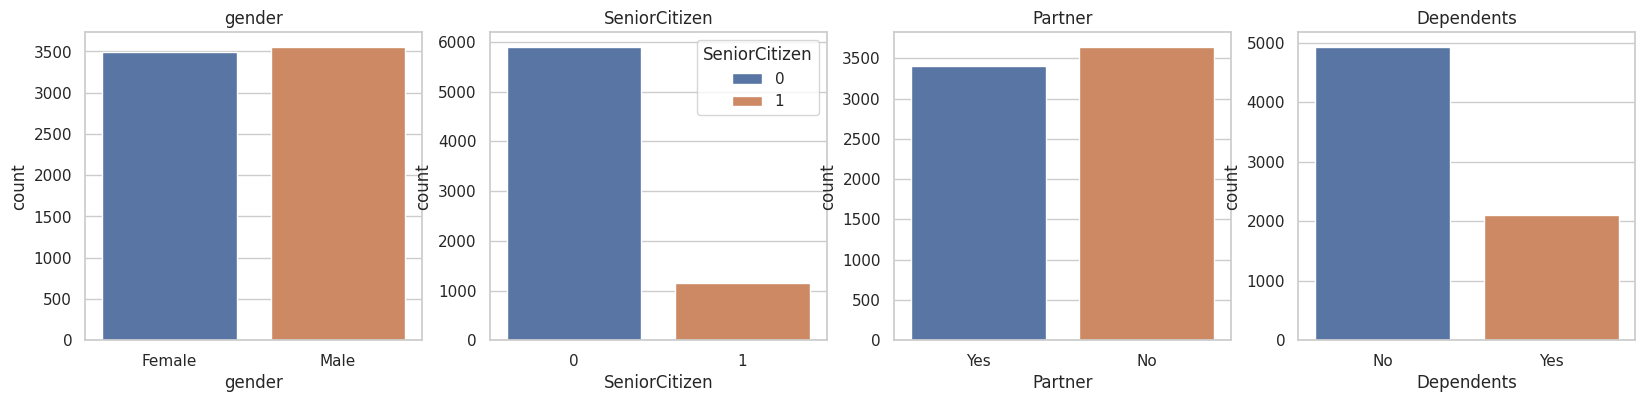

In [ ]:
import numpy as np

cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df, hue = str(col))
    ax.set_title(f"{col}")

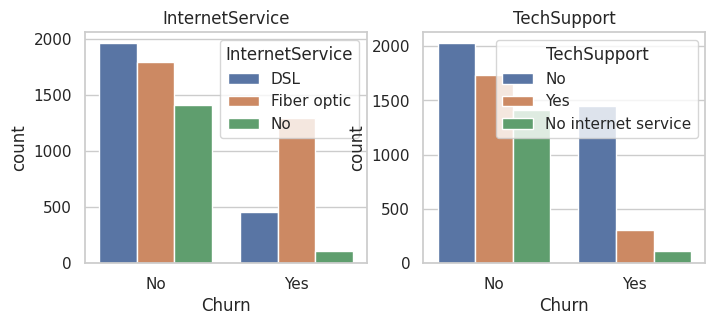

In [ ]:
cols = ['InternetService',"TechSupport"]

plt.figure(figsize=(8,3))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

In [ ]:
df.drop(columns=['customerID'], inplace=True, axis=1)

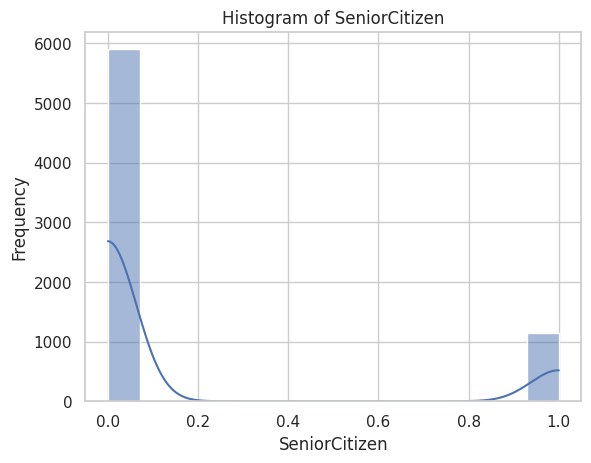

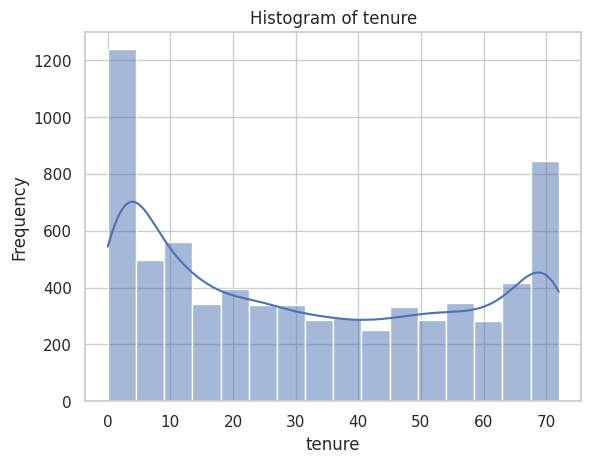

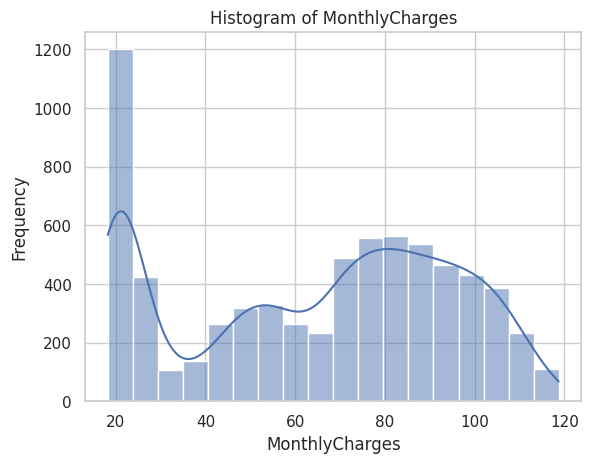

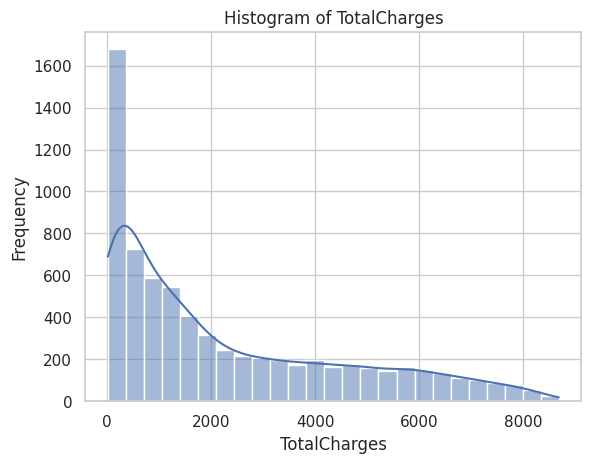

In [ ]:
import seaborn as sns
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
for column in numerical_columns:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

One-Hot Encoding the data

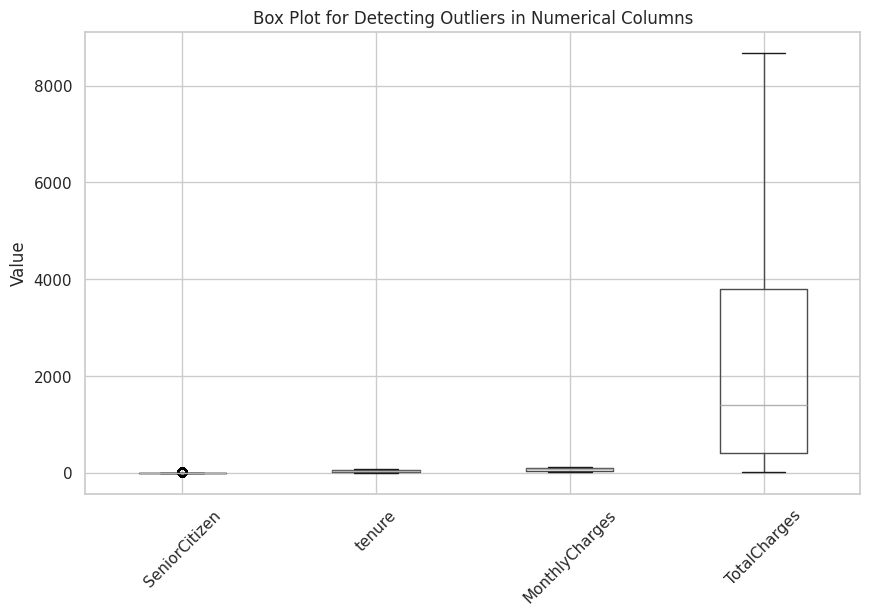

In [ ]:
import matplotlib.pyplot as plt

df[numerical_columns].boxplot(figsize=(10, 6))
plt.title('Box Plot for Detecting Outliers in Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=[
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
], drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


**Min-Max Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Select numerical columns to scale
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Apply Min-Max Scaling
df_min_max_scaled = df_encoded.copy()
df_min_max_scaled[numerical_columns] = min_max_scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the scaled dataset
df_min_max_scaled.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,0.013889,0.115423,0.001275,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0.0,0.472222,0.385075,0.215867,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.0,0.027778,0.354229,0.010310,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0.0,0.625000,0.239303,0.210241,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0.0,0.027778,0.521891,0.015330,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


**Standardisation**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply Z-score Scaling
df_standard_scaled = df_encoded.copy()
df_standard_scaled[numerical_columns] = standard_scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the standardized dataset
df_standard_scaled.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-0.439916,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,-0.439916,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,-0.439916,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,-0.439916,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


**Robust Scaling**

In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Apply Robust Scaling
df_robust_scaled = df_encoded.copy()
df_robust_scaled[numerical_columns] = robust_scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the robustly scaled dataset
df_robust_scaled.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,-0.608696,-0.745170,-0.404100,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0.0,0.108696,-0.246550,0.145381,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.0,-0.586957,-0.303588,-0.380964,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0.0,0.347826,-0.516099,0.130977,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0.0,-0.586957,0.006440,-0.368111,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


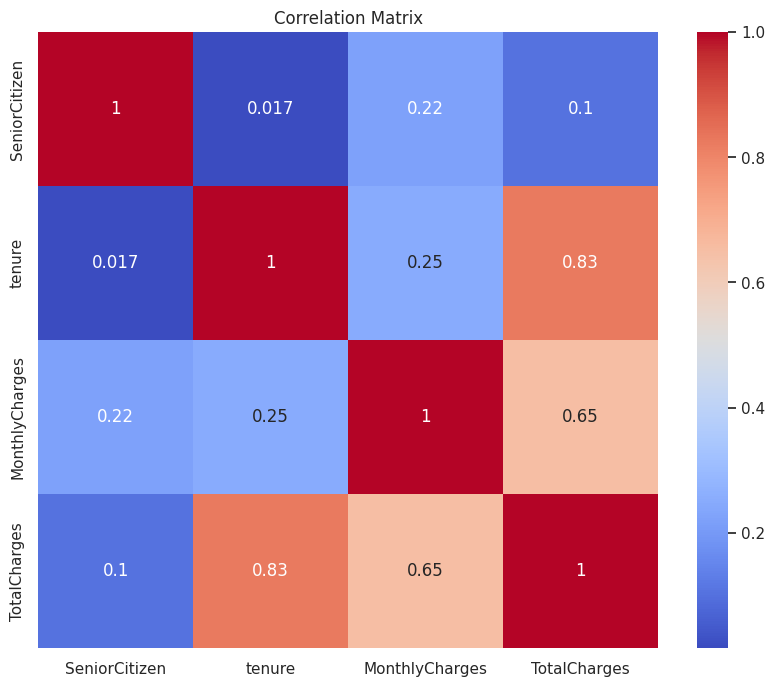

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
corr_matrix = df_robust_scaled[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

**Max Absolute scaling**


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# Initialize the MaxAbsScaler
max_abs_scaler = MaxAbsScaler()

# Apply Max Abs Scaling
df_max_abs_scaled = df_encoded.copy()
df_max_abs_scaled[numerical_columns] = max_abs_scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the max absolute scaled dataset
df_max_abs_scaled.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,0.013889,0.251368,0.003437,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0.0,0.472222,0.479579,0.217564,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.0,0.027778,0.453474,0.012453,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0.0,0.625000,0.356211,0.211951,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0.0,0.027778,0.595368,0.017462,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


# Gradient Boosting Classifier


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Encode the categorical variables and drop the customerID column
df_encoded = pd.get_dummies(df, drop_first=True)

# Define the target variable
target_column = 'Churn_Yes'  # Adjust this based on your encoding

# Define features and target
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Scaling techniques
scalers = {
    "MinMax": MinMaxScaler(),
    "Standard": StandardScaler(),
    "Robust": RobustScaler(),
    "MaxAbs": MaxAbsScaler()
}

scaled_dfs = {}
for name, scaler in scalers.items():
    scaled_features = scaler.fit_transform(X)
    scaled_dfs[name] = pd.DataFrame(scaled_features, columns=X.columns)

# Creating the scaled DataFrames
df_min_max = scaled_dfs["MinMax"]
df_standard = scaled_dfs["Standard"]
df_robust = scaled_dfs["Robust"]
df_max_abs = scaled_dfs["MaxAbs"]

# Add the target variable back to each scaled DataFrame
df_min_max[target_column] = y.values
df_standard[target_column] = y.values
df_robust[target_column] = y.values
df_max_abs[target_column] = y.values

# Split the data into training and testing sets for each scaling method
X_train_min_max, X_test_min_max, y_train_min_max, y_test_min_max = train_test_split(
    df_min_max.drop(columns=[target_column]), df_min_max[target_column], test_size=0.2, random_state=42)

X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(
    df_standard.drop(columns=[target_column]), df_standard[target_column], test_size=0.2, random_state=42)

X_train_robust, X_test_robust, y_train_robust, y_test_robust = train_test_split(
    df_robust.drop(columns=[target_column]), df_robust[target_column], test_size=0.2, random_state=42)

X_train_max_abs, X_test_max_abs, y_train_max_abs, y_test_max_abs = train_test_split(
    df_max_abs.drop(columns=[target_column]), df_max_abs[target_column], test_size=0.2, random_state=42)

# Function to train and evaluate model
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred)

# Train and evaluate using each scaling method
print("Min-Max Scaling Report:")
print(train_and_evaluate(X_train_min_max, X_test_min_max, y_train_min_max, y_test_min_max))

print("Z-score Scaling Report:")
print(train_and_evaluate(X_train_standard, X_test_standard, y_train_standard, y_test_standard))

print("Robust Scaling Report:")
print(train_and_evaluate(X_train_robust, X_test_robust, y_train_robust, y_test_robust))

print("Max Abs Scaling Report:")
print(train_and_evaluate(X_train_max_abs, X_test_max_abs, y_train_max_abs, y_test_max_abs))


Min-Max Scaling Report:
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1036
        True       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Z-score Scaling Report:
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1036
        True       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Robust Scaling Report:
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1036
        True       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
wei

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model and RFE
model = GradientBoostingClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)  # Adjust number of features as needed

# Fit RFE on the training data
rfe.fit(X_train_min_max, y_train_min_max)  # Example using Min-Max scaled data

# Select the top features
selected_features = X_train_min_max.columns[rfe.support_]
X_train_rfe = rfe.transform(X_train_min_max)
X_test_rfe = rfe.transform(X_test_min_max)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Initialize and fit the model on the training data (example here uses Min-Max scaled data)
model = GradientBoostingClassifier()
model.fit(X_train_min_max, y_train_min_max)

# Once fitted, we can access feature_importances_
importances = model.feature_importances_

# Get the indices of the top features and select them
indices = np.argsort(importances)[::-1][:10]  # Adjust the number of features as needed
selected_features_tree = X_train_min_max.columns[indices]

# Create new training and testing datasets with only the top features
X_train_tree = X_train_min_max[selected_features_tree]
X_test_tree = X_test_min_max[selected_features_tree]

# Display the selected features
print("Selected features based on feature importance:", selected_features_tree)


Selected features based on feature importance: Index(['tenure', 'InternetService_Fiber optic',
       'PaymentMethod_Electronic check', 'Contract_Two year', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'TechSupport_No internet service'],
      dtype='object')


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Adjust components based on explained variance
X_train_pca = pca.fit_transform(X_train_min_max)
X_test_pca = pca.transform(X_test_min_max)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)  # Adjust based on data
X_train_lda = lda.fit_transform(X_train_min_max, y_train_min_max)
X_test_lda = lda.transform(X_test_min_max)


In [ ]:
# Define a function for evaluation
def evaluate_feature_selection(X_train, X_test, y_train, y_test, method_name):
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{method_name} Report:")
    print(classification_report(y_test, y_pred))

# Evaluate RFE
evaluate_feature_selection(X_train_rfe, X_test_rfe, y_train_min_max, y_test_min_max, "RFE")

# Evaluate PCA
evaluate_feature_selection(X_train_pca, X_test_pca, y_train_min_max, y_test_min_max, "PCA")

# Evaluate Tree-Based Selection
evaluate_feature_selection(X_train_tree, X_test_tree, y_train_min_max, y_test_min_max, "Tree-Based Selection")

# Evaluate LDA
evaluate_feature_selection(X_train_lda, X_test_lda, y_train_min_max, y_test_min_max, "LDA")


RFE Report:
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1036
        True       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

PCA Report:
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1036
        True       0.65      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Tree-Based Selection Report:
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1036
        True       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.

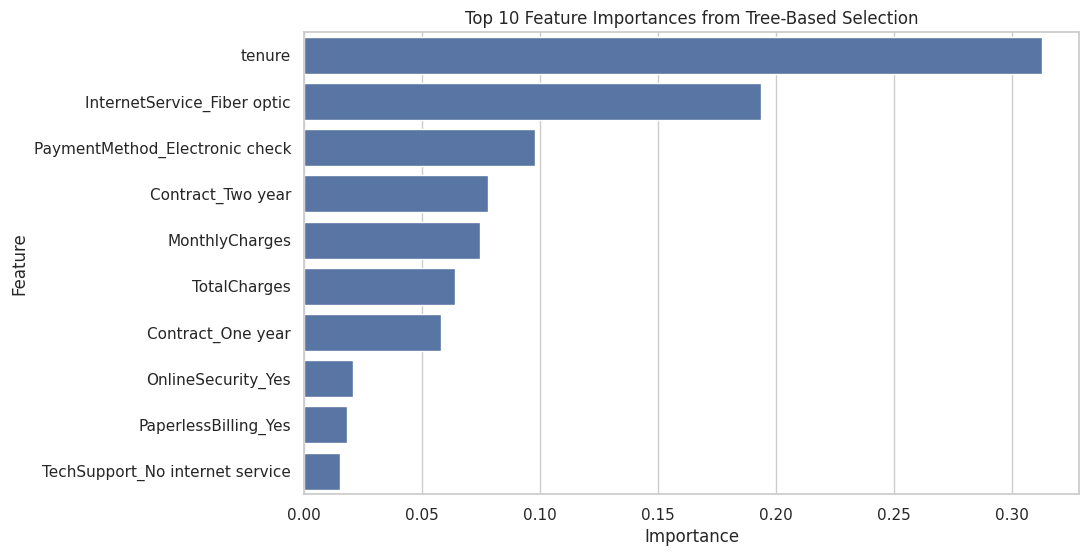

<ipython-input-103-c59544569dbc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=f1_scores, palette='viridis')


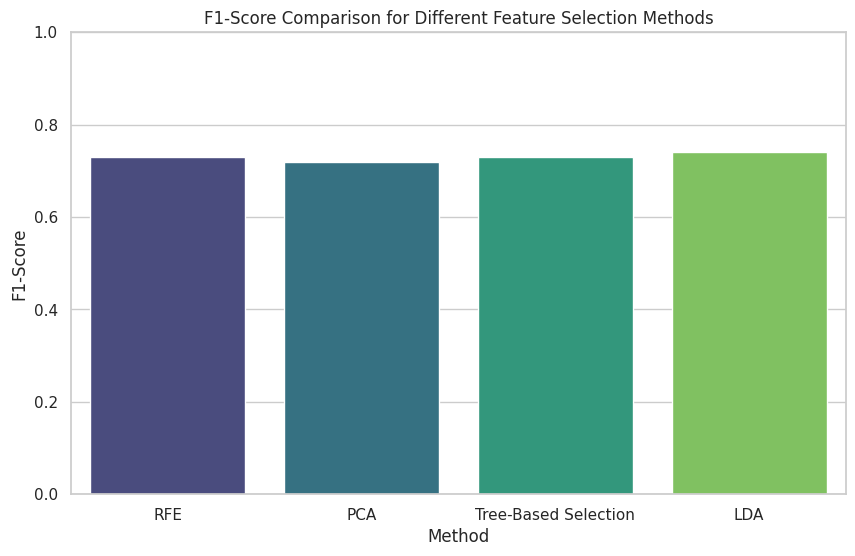

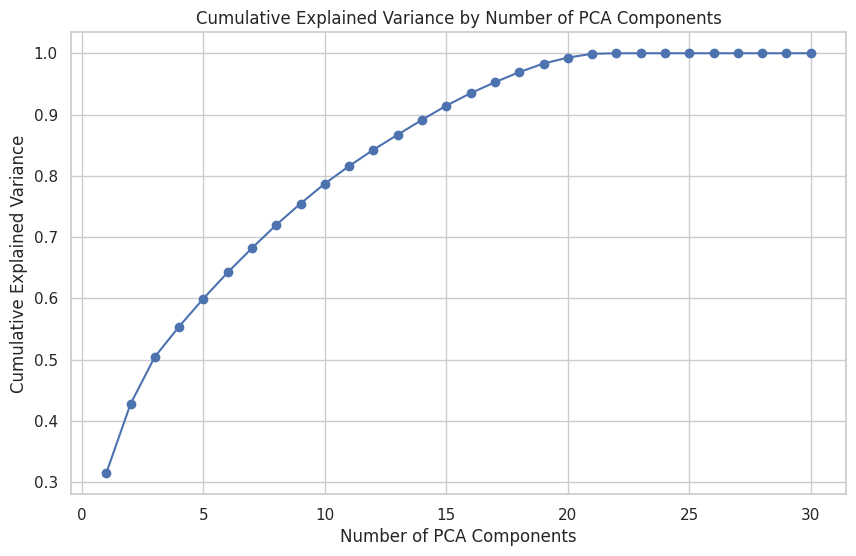

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot the feature importances from Tree-Based Selection
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:10], y=selected_features_tree)
plt.title("Top 10 Feature Importances from Tree-Based Selection")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 2. Performance Metrics Comparison (F1-Score for each method)
# Example F1-scores based on your reports
methods = ['RFE', 'PCA', 'Tree-Based Selection', 'LDA']
f1_scores = [0.73, 0.72, 0.73, 0.74]  # Replace with actual computed F1-scores if different

plt.figure(figsize=(10, 6))
sns.barplot(x=methods, y=f1_scores, palette='viridis')
plt.title("F1-Score Comparison for Different Feature Selection Methods")
plt.xlabel("Method")
plt.ylabel("F1-Score")
plt.ylim(0, 1)  # Set y-axis to 0-1 for consistency with F1-score range
plt.show()

# 3. Cumulative Explained Variance for PCA Components
# Fit PCA on the data to extract cumulative explained variance
pca = PCA(n_components=X_train_min_max.shape[1])
pca.fit(X_train_min_max)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
plt.title("Cumulative Explained Variance by Number of PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first=True to avoid multicollinearity

# Step 1: Print the columns of the DataFrame
print(df.columns)

# Define your target column
target_column = 'Churn'

# Split your data into features and target
X = df.drop(columns=[target_column])
y = df[target_column]


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the columns of the encoded DataFrame
print(df_encoded.columns)

# Define the target column
target_column = 'Churn_Yes'

# Split your data into features and target
X = df_encoded.drop(columns=[target_column])  # Dropping only the target column
y = df_encoded[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the model
sgb_model = GradientBoostingClassifier(random_state=42, learning_rate= 0.1, max_depth= 3, n_estimators= 100)

# Fit the model
sgb_model.fit(X_train, y_train)

# Make predictions
y_pred = sgb_model.predict(X_test)

# Print the classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')
Accuracy: 0.7991483321504613
              precision    recall  f1-score   support

       False       0.84 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=sgb_model, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


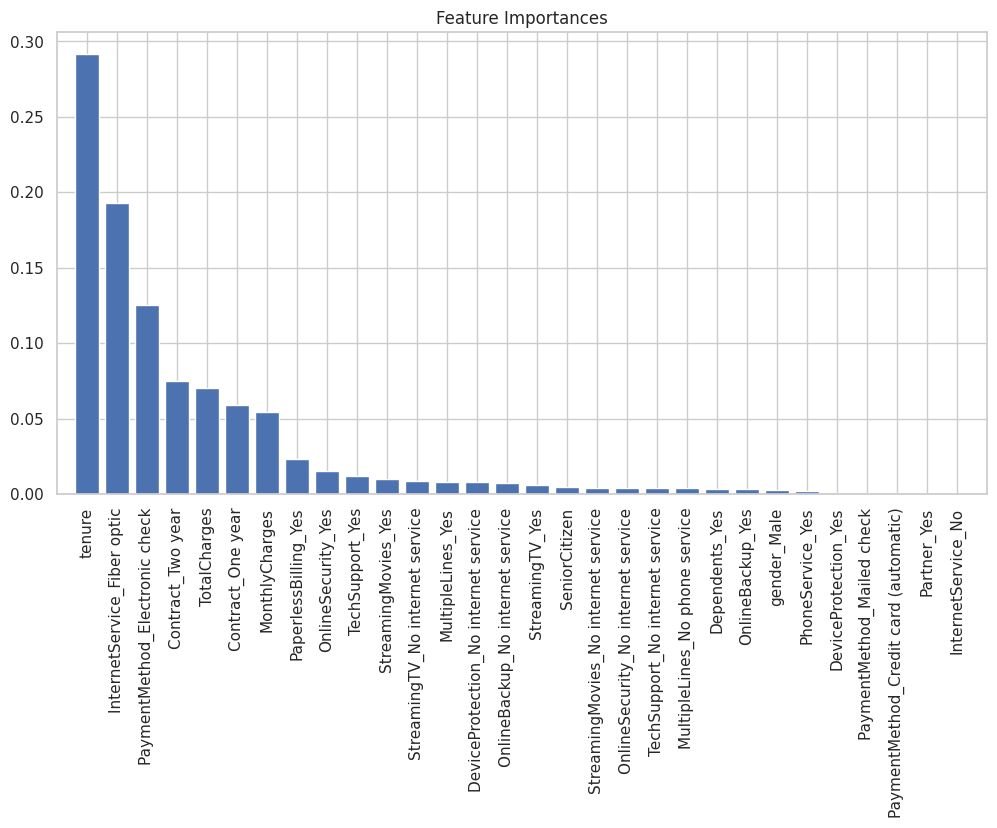

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = sgb_model.feature_importances_
feature_names = X.columns

# Sort feature importances
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=sgb_model, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
df_encoded.iloc[2]

,2
SeniorCitizen,0
tenure,2
MonthlyCharges,53.85
TotalCharges,108.15
gender_Male,True
Partner_Yes,False
Dependents_Yes,False
PhoneService_Yes,True
MultipleLines_No phone service,False
MultipleLines_Yes,False


In [ ]:
# Function to predict churn for hardcoded inputs
def predict_churn(model,input_features):
    # Hardcoded feature values (adjust these as needed)


    # Convert to pandas DataFrame with appropriate column names (matching training data)
    feature_columns = [
        'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
        'MultipleLines_No phone service', 'MultipleLines_Yes',
        'InternetService_Fiber optic', 'InternetService_No',
        'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
        'OnlineBackup_No internet service', 'OnlineBackup_Yes',
        'DeviceProtection_No internet service', 'DeviceProtection_Yes',
        'TechSupport_No internet service', 'TechSupport_Yes',
        'StreamingTV_No internet service', 'StreamingTV_Yes',
        'StreamingMovies_No internet service', 'StreamingMovies_Yes',
        'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
        'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
        'PaymentMethod_Mailed check'
    ]

    # Convert input to DataFrame to ensure it matches the model's expected input format
    input_df = pd.DataFrame(input_features, columns=feature_columns)

    # Predict churn
    prediction = model.predict(input_df)

    # Interpret and print the result
    if prediction[0] == 1:
        print("Prediction: The customer is likely to churn.")
    else:
        print("Prediction: The customer is not likely to churn.")

# Usage example (after training)
Churn = np.array([
        0,          # SeniorCitizen (0 = not senior)
        2,          # Tenure in months
        53.85,      # Monthly charges
        108.15,     # Total charges
        1,          # gender_Male (True => 1)
        0,          # Partner_Yes (False => 0)
        0,          # Dependents_Yes (False => 0)
        1,          # PhoneService_Yes (True => 1)
        0,          # MultipleLines_No phone service (False => 0)
        0,          # MultipleLines_Yes (False => 0)
        0,          # InternetService_Fiber optic (False => 0)
        0,          # InternetService_No (False => 0)
        0,          # OnlineSecurity_No internet service (False => 0)
        1,          # OnlineSecurity_Yes (True => 1)
        0,          # OnlineBackup_No internet service (False => 0)
        1,          # OnlineBackup_Yes (True => 1)
        0,          # DeviceProtection_No internet service (False => 0)
        0,          # DeviceProtection_Yes (False => 0)
        0,          # TechSupport_No internet service (False => 0)
        0,          # TechSupport_Yes (False => 0)
        0,          # StreamingTV_No internet service (False => 0)
        0,          # StreamingTV_Yes (False => 0)
        0,          # StreamingMovies_No internet service (False => 0)
        0,          # StreamingMovies_Yes (False => 0)
        0,          # Contract_One year (False => 0)
        0,          # Contract_Two year (False => 0)
        1,          # PaperlessBilling_Yes (True => 1)
        0,          # PaymentMethod_Credit card (automatic) (False => 0)
        0,          # PaymentMethod_Electronic check (False => 0)
        1           # PaymentMethod_Mailed check (True => 1)
    ]).reshape(1, -1)  # Reshape for a single sample input

not_Churn = np.array([
        1,          # SeniorCitizen (1 if senior, 0 if not)
        24,         # Tenure in months
        85.99,      # Monthly charges
        2050.50,    # Total charges
        1,          # gender_Male (1 for male, 0 for female)
        1,          # Partner_Yes (1 if partner exists, 0 if not)
        1,          # Dependents_Yes (1 if dependents exist, 0 if not)
        1,          # PhoneService_Yes (1 if yes, 0 if no)
        0,          # MultipleLines_No phone service (1 if no phone service, 0 if has multiple lines)
        1,          # MultipleLines_Yes (1 if yes, 0 if no)
        1,          # InternetService_Fiber optic (1 if fiber optic, 0 if not)
        0,          # InternetService_No (1 if no internet, 0 if fiber optic)
        1,          # OnlineSecurity_No internet service (1 if no internet, 0 if has security)
        0,          # OnlineSecurity_Yes (1 if yes, 0 if no security)
        1,          # OnlineBackup_No internet service (1 if no internet, 0 if has backup)
        0,          # OnlineBackup_Yes (1 if yes, 0 if no backup)
        1,          # DeviceProtection_No internet service (1 if no internet, 0 if has protection)
        0,          # DeviceProtection_Yes (1 if yes, 0 if has protection)
        1,          # TechSupport_No internet service (1 if no internet, 0 if has tech support)
        0,          # TechSupport_Yes (1 if yes, 0 if has tech support)
        1,          # StreamingTV_No internet service (1 if no internet, 0 if has TV service)
        0,          # StreamingTV_Yes (1 if yes, 0 if has TV service)
        1,          # StreamingMovies_No internet service (1 if no internet, 0 if has movies)
        0,          # StreamingMovies_Yes (1 if yes, 0 if has movies)
        0,          # Contract_One year (1 if one year contract, 0 if not)
        1,          # Contract_Two year (1 if two years contract, 0 if not)
        1,          # PaperlessBilling_Yes (1 if paperless billing, 0 if not)
        0,          # PaymentMethod_Credit card (automatic) (1 if credit card, 0 if not)
        1,          # PaymentMethod_Electronic check (1 if electronic check, 0 if not)
        0           # PaymentMethod_Mailed check (1 if mailed check, 0 if not)
    ]).reshape(1, -1)  # Reshape for a single sample input
predict_churn(sgb_model,Churn)
predict_churn(sgb_model,not_Churn)




Prediction: The customer is likely to churn.
Prediction: The customer is not likely to churn.


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion= 'entropy',random_state=42, max_depth=5, min_samples_leaf=4, min_samples_split= 2)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Print the classification report
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7920511000709723
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1035
        True       0.65      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Hyperparameter Tuning on DT

In [ ]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],  # Explore different depths
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=2)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Print the classification report
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7920511000709723
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1035
        True       0.65      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



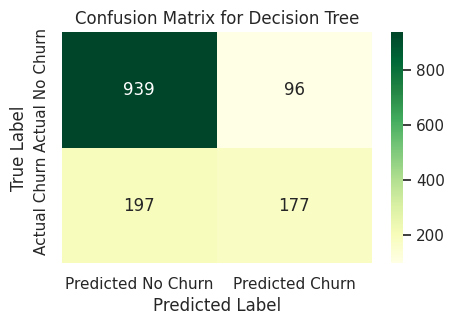

In [ ]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Ploting the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="YlGn",
            xticklabels=["Predicted No Churn", "Predicted Churn"],
            yticklabels=["Actual No Churn", "Actual Churn"])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

for scaler_name, scaler in scalers.items():
    # Create a pipeline with scaling and Logistic Regression
    pipeline = Pipeline([
        ('scaler', scaler),
        ('logreg', LogisticRegression(random_state=42, max_iter=1000))
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Scaler: {scaler_name}, Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("-" * 30)


Scaler: MinMax, Accuracy: 0.7984386089425124
              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1035
        True       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

------------------------------
Scaler: Standard, Accuracy: 0.8069552874378992
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1035
        True       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

------------------------------
Scaler: Robust, Accuracy: 0.8019872249822569
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1035
        True       0.65      0.55     

In [ ]:
# Using Robust Scaling for performing logistic regression
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_model = LogisticRegression(random_state=42, max_iter=200)
logreg_model.fit(X_train_scaled, y_train)     # Fitting the model

#Make Predictions
y_pred_logreg = logreg_model.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

#Evaluating the model
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8019872249822569
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1035
        True       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



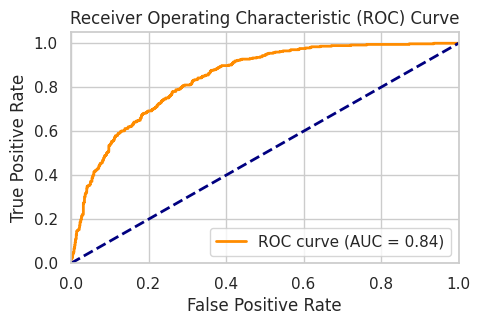

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

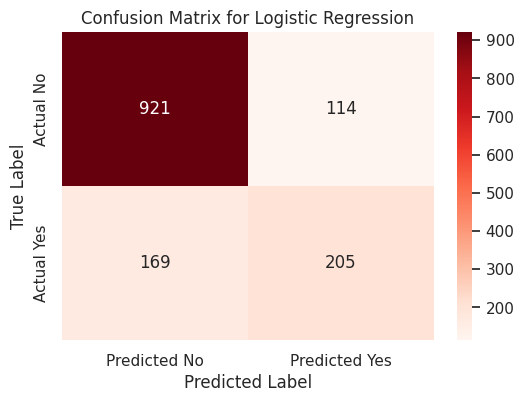

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
def predict_churn(model,input_features):
    # Hardcoded feature values (adjust these as needed)


    # Convert to pandas DataFrame with appropriate column names (matching training data)
    feature_columns = [
        'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
        'MultipleLines_No phone service', 'MultipleLines_Yes',
        'InternetService_Fiber optic', 'InternetService_No',
        'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
        'OnlineBackup_No internet service', 'OnlineBackup_Yes',
        'DeviceProtection_No internet service', 'DeviceProtection_Yes',
        'TechSupport_No internet service', 'TechSupport_Yes',
        'StreamingTV_No internet service', 'StreamingTV_Yes',
        'StreamingMovies_No internet service', 'StreamingMovies_Yes',
        'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
        'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
        'PaymentMethod_Mailed check'
    ]

    # Convert input to DataFrame to ensure it matches the model's expected input format
    input_df = pd.DataFrame(input_features, columns=feature_columns)

    # Predict churn
    prediction = model.predict(input_df)

    # Interpret and print the result
    if prediction[0] == 1:
        print("Prediction: The customer is likely to churn.")
    else:
        print("Prediction: The customer is not likely to churn.")






#AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

scalers = {
    "MinMax": MinMaxScaler(),
    "Standard": StandardScaler(),
    "Robust": RobustScaler(),
    "MaxAbs": MaxAbsScaler()
}

# Iterate through each scaling method
for scaler_name, scaler in scalers.items():
    # Create a pipeline with scaling and AdaBoost Classifier
    pipeline = Pipeline([
        ('scaler', scaler),
        ('AdaBoost', AdaBoostClassifier(algorithm="SAMME", random_state=42))
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Scaler: {scaler_name}, Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Scaler: MinMax, Accuracy: 0.8055358410220014
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1035
        True       0.66      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

------------------------------
Scaler: Standard, Accuracy: 0.8055358410220014
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1035
        True       0.66      0.55      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

------------------------------
Scaler: Robust, Accuracy: 0.8055358410220014
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1035
        True       0.66      0.55     

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5],
    'estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3)
    ]
}

# Initialize the AdaBoostClassifier
ada_model = AdaBoostClassifier(algorithm="SAMME", random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=ada_model,
    param_distributions=param_distributions,
    n_iter=20,  # Number of random parameter combinations to try
    scoring='accuracy',
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=42  # Ensures reproducibility
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
print(f"Best Hyperparameters for AdaBoost: {best_params}")

# Use the best model for predictions
best_ada_classifier = random_search.best_estimator_
y_pred_best_ada = best_ada_classifier.predict(X_test)

# Evaluate the best model
accuracy_best_ada = accuracy_score(y_test, y_pred_best_ada)
print(f"AdaBoost Accuracy (with best params): {accuracy_best_ada}")
print(classification_report(y_test, y_pred_best_ada))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters for AdaBoost: {'n_estimators': 250, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=2)}
AdaBoost Accuracy (with best params): 0.7984386089425124
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1035
        True       0.67      0.48      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



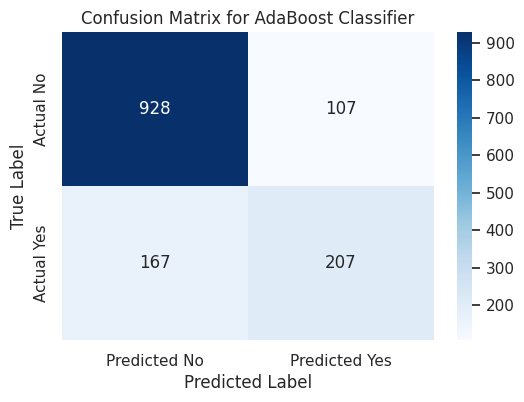

In [ ]:
# Visualization (Confusion Matrix)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Support Vector Machines

In [ ]:
from sklearn.svm import SVC

# Iterate through each scaling method
for scaler_name, scaler in scalers.items():
    # Create a pipeline with scaling and AdaBoost Classifier
    pipeline = Pipeline([
        ('scaler', scaler),
        ('SVM', SVC(random_state=42))  # Create an SVC object)
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Scaler: {scaler_name}, Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Scaler: MinMax, Accuracy: 0.7892122072391767
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1035
        True       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

------------------------------
Scaler: Standard, Accuracy: 0.7927608232789212
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1035
        True       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

------------------------------
Scaler: Robust, Accuracy: 0.794889992902768
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1035
        True       0.65      0.49      

In [ ]:
# Initialize and train the SVM Model
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)       # Scale test data

svm_model = SVC(random_state=42, kernel= 'linear', gamma= 'scale', C= 0.1)  # You can try different kernels
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.794180269694819
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1035
        True       0.63      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the parameter distribution for RandomizedSearchCV with the SVM step prefix
param_distributions = {
    'SVM__C': [0.1, 1, 10, 100],  # Regularization parameter for SVM
    'SVM__kernel': ['linear', 'rbf', 'poly'],  # Kernel type for SVM
    'SVM__gamma': ['scale', 'auto', 0.1, 1, 10]  # Kernel coefficient for 'rbf' and 'poly' kernels
}

# Create a pipeline with scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add scaling to standardize features
    ('SVM', SVC(random_state=42))
])

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    scoring='accuracy',
    n_iter=10,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
print(f"Best Hyperparameters for SVM: {best_params}")

# Use the best model for predictions
best_svm_classifier = random_search.best_estimator_
y_pred_best_svm = best_svm_classifier.predict(X_test)  # Assuming X_test is defined

# Evaluate the best model
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"SVM Accuracy (with best params): {accuracy_best_svm}")
print(classification_report(y_test, y_pred_best_svm))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for SVM: {'SVM__kernel': 'linear', 'SVM__gamma': 'scale', 'SVM__C': 0.1}
SVM Accuracy (with best params): 0.7885024840312278
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1035
        True       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



#**Random Forrest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

target_column = 'Churn_Yes'
# Split your data into features and target
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators = 500, min_samples_split =  5, min_samples_leaf = 4, max_depth= 10 )

# Train the model
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Print the classification report
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8048261178140526
              precision    recall  f1-score   support

       False       0.84      0.91      0.87      1035
        True       0.67      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_distributions,
    scoring='accuracy',
    n_iter=20,  # Number of random parameter combinations to try
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=42  # Ensures reproducibility
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model for predictions
best_rf_classifier = random_search.best_estimator_
y_pred_best_rf = best_rf_classifier.predict(X_test)

# Evaluate the best model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Random Forest Accuracy (with best params): {accuracy_best_rf}")
print(classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Random Forest Accuracy (with best params): 0.8048261178140526
              precision    recall  f1-score   support

       False       0.84      0.91      0.87      1035
        True       0.67      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



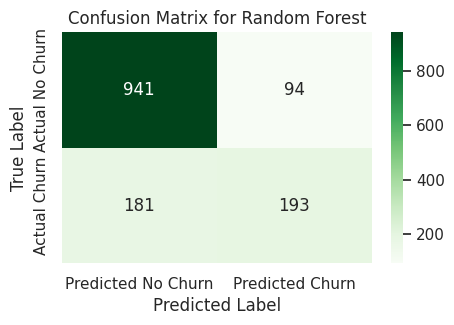

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_rf)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Predicted No Churn", "Predicted Churn"],
            yticklabels=["Actual No Churn", "Actual Churn"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
not_Churn = np.array([
        1,          # SeniorCitizen (1 if senior, 0 if not)
        24,         # Tenure in months
        85.99,      # Monthly charges
        2050.50,    # Total charges
        1,          # gender_Male (1 for male, 0 for female)
        1,          # Partner_Yes (1 if partner exists, 0 if not)
        1,          # Dependents_Yes (1 if dependents exist, 0 if not)
        1,          # PhoneService_Yes (1 if yes, 0 if no)
        0,          # MultipleLines_No phone service (1 if no phone service, 0 if has multiple lines)
        1,          # MultipleLines_Yes (1 if yes, 0 if no)
        1,          # InternetService_Fiber optic (1 if fiber optic, 0 if not)
        0,          # InternetService_No (1 if no internet, 0 if fiber optic)
        1,          # OnlineSecurity_No internet service (1 if no internet, 0 if has security)
        0,          # OnlineSecurity_Yes (1 if yes, 0 if no security)
        1,          # OnlineBackup_No internet service (1 if no internet, 0 if has backup)
        0,          # OnlineBackup_Yes (1 if yes, 0 if no backup)
        1,          # DeviceProtection_No internet service (1 if no internet, 0 if has protection)
        0,          # DeviceProtection_Yes (1 if yes, 0 if has protection)
        1,          # TechSupport_No internet service (1 if no internet, 0 if has tech support)
        0,          # TechSupport_Yes (1 if yes, 0 if has tech support)
        1,          # StreamingTV_No internet service (1 if no internet, 0 if has TV service)
        0,          # StreamingTV_Yes (1 if yes, 0 if has TV service)
        1,          # StreamingMovies_No internet service (1 if no internet, 0 if has movies)
        0,          # StreamingMovies_Yes (1 if yes, 0 if has movies)
        0,          # Contract_One year (1 if one year contract, 0 if not)
        1,          # Contract_Two year (1 if two years contract, 0 if not)
        1,          # PaperlessBilling_Yes (1 if paperless billing, 0 if not)
        0,          # PaymentMethod_Credit card (automatic) (1 if credit card, 0 if not)
        1,          # PaymentMethod_Electronic check (1 if electronic check, 0 if not)
        0           # PaymentMethod_Mailed check (1 if mailed check, 0 if not)
    ]).reshape(1, -1)  # Reshape for a single sample input

pipeline = Pipeline([
        ('scaler', scaler),
        ('AdaBoost', AdaBoostClassifier(algorithm="SAMME", random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

print("Gradient Boosting")
predict_churn(sgb_model,not_Churn)
print("Random Forrest")
predict_churn(rf_classifier,not_Churn)
print("Logistic Regression")
predict_churn(logreg_model,not_Churn)
print("SVM")
predict_churn(svm_model,not_Churn)
print("Ada Boost")
predict_churn(pipeline.fit(X_train, y_train),not_Churn)

Gradient Boosting
Prediction: The customer is not likely to churn.
Random Forrest
Prediction: The customer is not likely to churn.
Logistic Regression
Prediction: The customer is likely to churn.
SVM
Prediction: The customer is not likely to churn.
Ada Boost
Prediction: The customer is not likely to churn.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["Gradient Boosting", "Decision Tree", "Logistic Regression", "AdaBoost", "Random Forest"]
accuracy = [0.799, 0.792, 0.802, 0.806, 0.786]
precision_true = [0.65, 0.65, 0.65, 0.66, 0.62]
recall_true = [0.52, 0.47, 0.55, 0.55, 0.49]
f1_score_true = [0.58, 0.55, 0.60, 0.60, 0.55]

# Plotting
x = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, accuracy, width, label="Accuracy", color="skyblue")
bars2 = ax.bar(x, precision_true, width, label="Precision (True)", color="lightgreen")
bars3 = ax.bar(x + width, recall_true, width, label="Recall (True)", color="salmon")
bars4 = ax.bar(x + 2*width, f1_score_true, width, label="F1-score (True)", color="orange")

# Labels and title
ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Performance Comparison of Models on Customer Churn Prediction")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()


In [ ]:

def display_feature_importance(model, feature_names):
    """
    Display feature importance or coefficients for different types of models.

    Parameters:
    model: Trained model (GradientBoosting, AdaBoost, RandomForest, DecisionTree, LogisticRegression)
    feature_names: List of feature names (columns in the dataset)
    """

    # Check for tree-based model feature importance
    if hasattr(model, 'feature_importances_'):
        # For models like Random Forest, Gradient Boosting, AdaBoost, Decision Tree
        importance = model.feature_importances_
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
        importance_df = importance_df.sort_values(by="Importance", ascending=False)
        print("Feature Importance:")
        print(importance_df)

    # Check for linear model coefficients
    elif hasattr(model, 'coef_'):
        # For Logistic Regression
        coefficients = model.coef_.flatten()  # Flatten in case it's multi-dimensional
        coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
        coef_df = coef_df.sort_values(by="Coefficient", ascending=False)
        print("Model Coefficients:")
        print(coef_df)

    else:
        print("The model type is not supported for feature importance extraction.")

# Example usage with different models
# Assuming X_train is your training dataset and feature_names is the list of column names in X_train
# Example models (replace with your actual trained models)
gb_model = sgb_model.fit(X_train, y_train)
ada_model
rf_model = rf_classifier.fit(X_train, y_train)
dt_model = dt_classifier.fit(X_train, y_train)

# Feature names (assuming feature names from X_train DataFrame)
feature_names = X_train.columns.tolist()

# Display feature importance / coefficients for each model
print("Gradient Boosting Feature Importance:")
display_feature_importance(gb_model, feature_names)
print("\nAdaBoost Feature Importance:")
display_feature_importance(ada_model, feature_names)
print("\nRandom Forest Feature Importance:")
display_feature_importance(rf_model, feature_names)
print("\nLogistic Regression Coefficients:")
display_feature_importance(logreg_model, feature_names)
print("\nDecision Tree Feature Importance:")
display_feature_importance(dt_model, feature_names)

Gradient Boosting Feature Importance:
Feature Importance:
                                  Feature  Importance
1                                  tenure    0.291531
10            InternetService_Fiber optic    0.192732
28         PaymentMethod_Electronic check    0.125032
25                      Contract_Two year    0.074660
3                            TotalCharges    0.070526
24                      Contract_One year    0.059233
2                          MonthlyCharges    0.054645
26                   PaperlessBilling_Yes    0.023136
13                     OnlineSecurity_Yes    0.015338
19                        TechSupport_Yes    0.011876
23                    StreamingMovies_Yes    0.009906
20        StreamingTV_No internet service    0.008721
9                       MultipleLines_Yes    0.007824
16   DeviceProtection_No internet service    0.007721
14       OnlineBackup_No internet service    0.007144
21                        StreamingTV_Yes    0.005750
0                       

AdaBoost does not support feature importances for this configuration.
Logistic Regression does not support feature importances for this configuration.


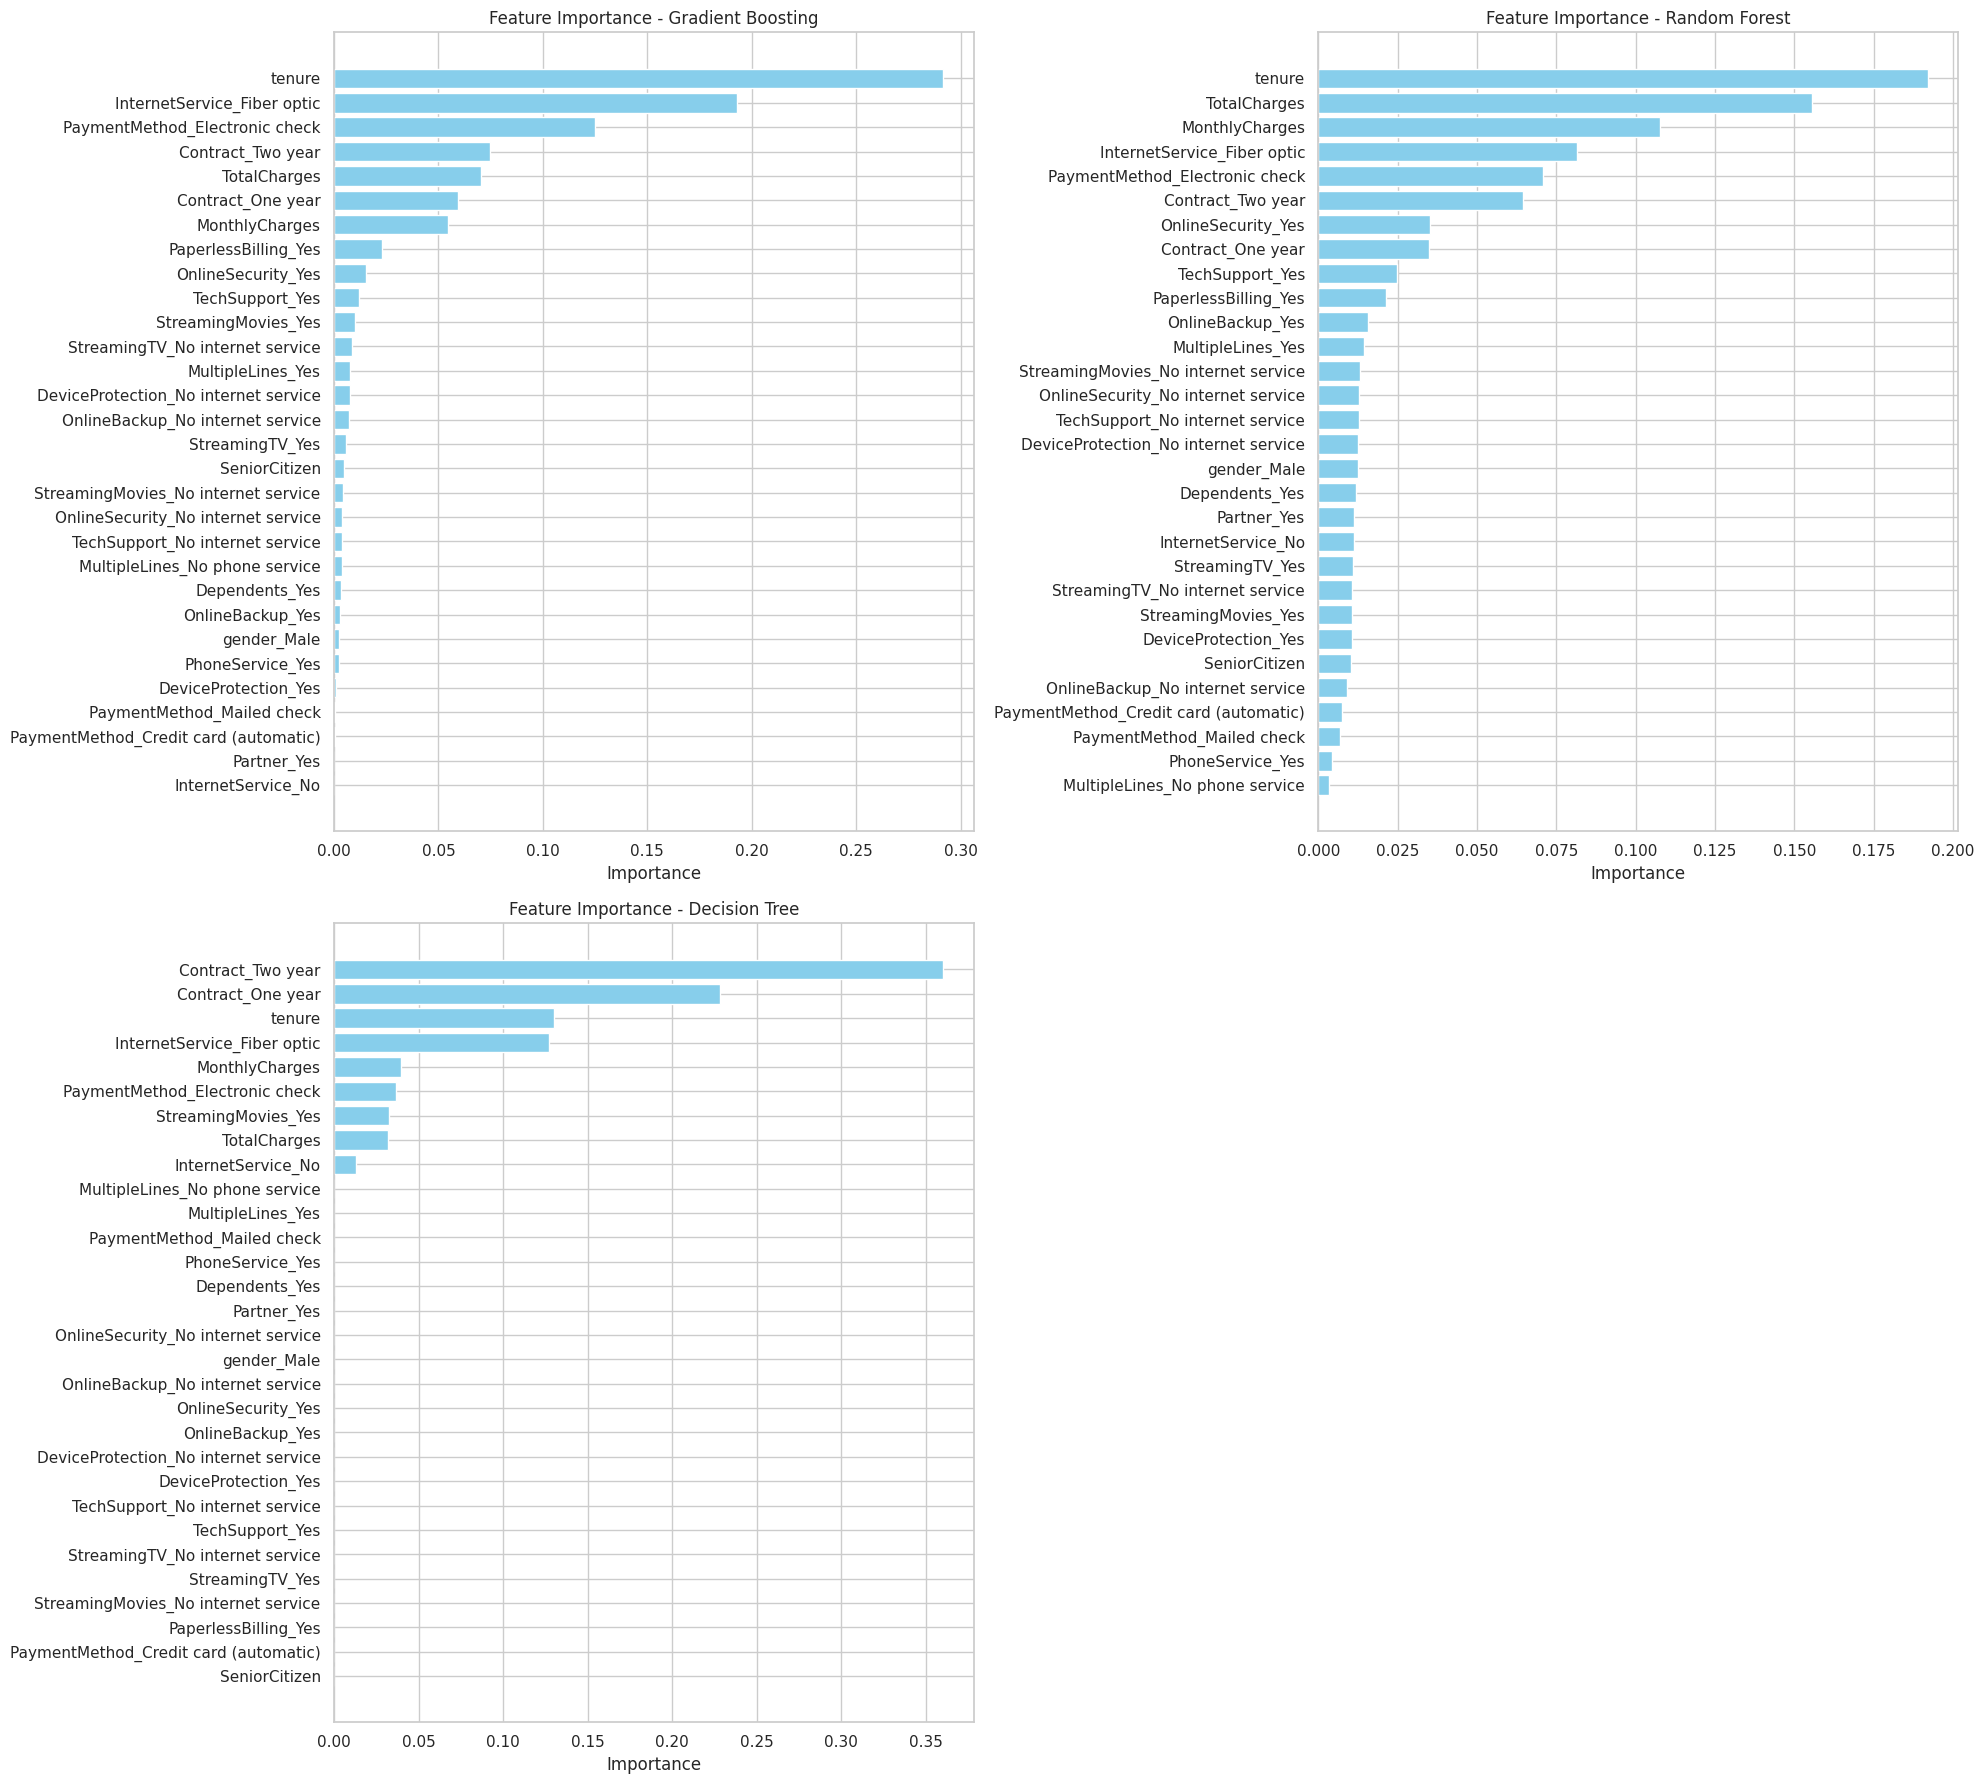

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Fit models and get feature importances (assuming already trained models)
# Replace 'gb_model' and other models with their respective variable names if different

# Get feature importance for each model
gradient_boosting_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=True)

random_forest_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=True)

decision_tree_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=True)

# AdaBoost does not always provide direct feature importances, so we skip if unsupported
try:
    ada_boost_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': ada_model.feature_importances_
    }).sort_values(by='Importance', ascending=True)
except AttributeError:
    ada_boost_importance = None
    print("AdaBoost does not support feature importances for this configuration.")
print("Logistic Regression does not support feature importances for this configuration.")


# Plotting each model's feature importances as separate bar plots

models = {
    "Gradient Boosting": gradient_boosting_importance,
    "Random Forest": random_forest_importance,
    "Decision Tree": decision_tree_importance,
    "AdaBoost": ada_boost_importance  # Only if feature importances are supported
}

plt.figure(figsize=(20, 18))
for i, (model_name, importance_df) in enumerate(models.items()):
    if importance_df is not None:  # Skip if no importances for model
        plt.subplot(2, 2, i+1)
        plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
        plt.title(f'Feature Importance - {model_name}')
        plt.xlabel('Importance')

plt.tight_layout()
plt.show()


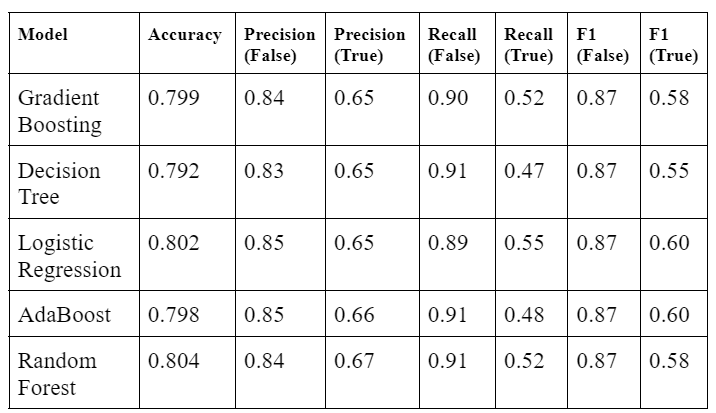

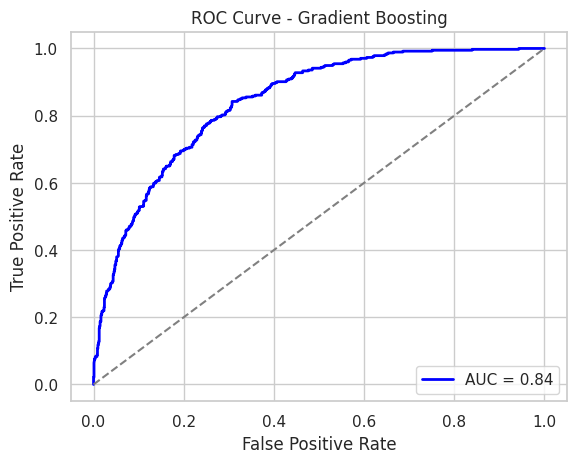

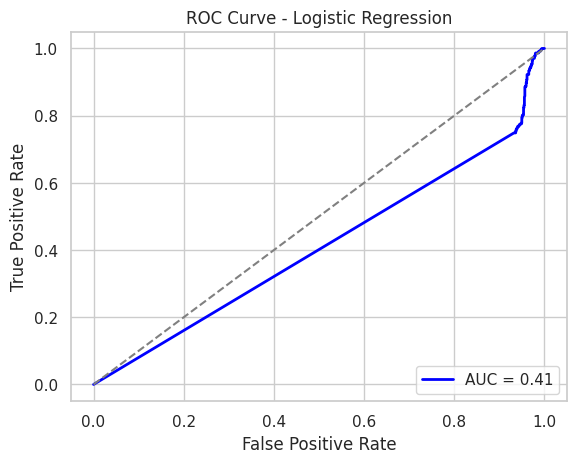

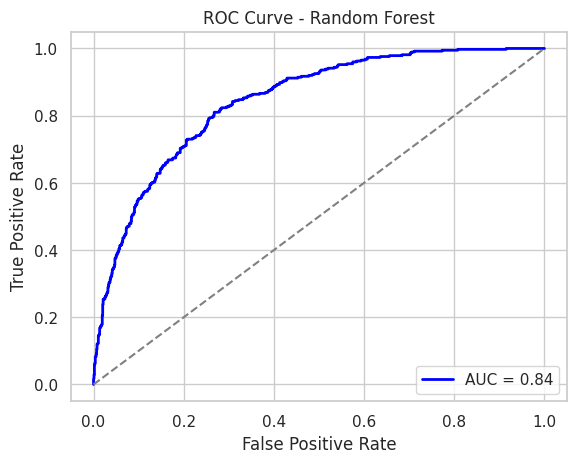

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test is your true labels and y_pred_proba is the predicted probabilities from each model
# Replace these with the appropriate variables in your code

models = {
    'Gradient Boosting': sgb_model,
    # 'Decision Tree': dt_model,
    'Logistic Regression': logreg_model,
    # 'AdaBoost': ada_model,
    'Random Forest': rf_classifier
}

for model_name, model in models.items():
    # Get the probability scores for the positive class (churn) for ROC calculation
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plotting each ROC curve in a separate figure
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
